In [14]:
!pip install opencv-python-headless
!pip install tensorflow opencv-python-headless


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pathlib
from sklearn.preprocessing import StandardScaler

import cv2


In [16]:
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

train_data_dir = pathlib.Path("D:/project2_face_emotion/Face_emotion_images/train")
print(train_data_dir)

test_data_dir = pathlib.Path("D:/project2_face_emotion/Face_emotion_images/train/validation")
print(test_data_dir)



D:\project2_face_emotion\Face_emotion_images\train
D:\project2_face_emotion\Face_emotion_images\train\validation


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Using the train_data_dir directory for training data
train_generator = train_data_gen.flow_from_directory(
    'D:/project2_face_emotion/Face_emotion_images/train',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical'
)

Found 28821 images belonging to 7 classes.


In [18]:
validation_generator = ImageDataGenerator().flow_from_directory(
    'D:/project2_face_emotion/Face_emotion_images/validation',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical'
)


Found 7066 images belonging to 7 classes.


In [19]:


train_data_dir = 'path/to/train_data_directory'
validation_data_dir = 'path/to/validation_data_directory'



# create model structure
emotion_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

# Compile the model
emotion_model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

# Print model summary
emotion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                 

In [20]:
# Train the neural network/model
emotion_model_info = emotion_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Epoch 1/15
451/451 [==============================] - 74s 162ms/step - loss: 1.7134 - accuracy: 0.3055 - val_loss: 59.9861 - val_accuracy: 0.3293
Epoch 2/15
451/451 [==============================] - 77s 170ms/step - loss: 1.4478 - accuracy: 0.4363 - val_loss: 80.1534 - val_accuracy: 0.3159
Epoch 3/15
451/451 [==============================] - 76s 169ms/step - loss: 1.3013 - accuracy: 0.4999 - val_loss: 54.8279 - val_accuracy: 0.3909
Epoch 4/15
451/451 [==============================] - 76s 168ms/step - loss: 1.2311 - accuracy: 0.5303 - val_loss: 74.1819 - val_accuracy: 0.3603
Epoch 5/15
451/451 [==============================] - 75s 165ms/step - loss: 1.1721 - accuracy: 0.5553 - val_loss: 56.6428 - val_accuracy: 0.4343
Epoch 6/15
451/451 [==============================] - 80s 177ms/step - loss: 1.1351 - accuracy: 0.5663 - val_loss: 64.4937 - val_accuracy: 0.4701
Epoch 7/15
451/451 [==============================] - 88s 196ms/step - loss: 1.0941 - accuracy: 0.5843 - val_loss: 57.3738 -

(48, 48, 1)


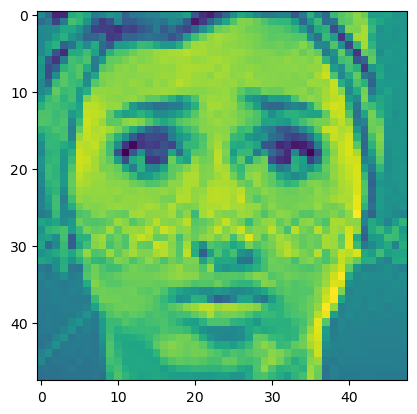

1/1 [==============================] - 0s 16ms/step
[0. 0. 1. 0. 0. 0. 0.]
The person facial emotion is: Fear


In [45]:
emotion_model.save('facial_emotions_model.h5')


from tensorflow.keras.preprocessing import image
img_path='D:/project2_face_emotion/Face_emotion_images/validation/fear/21967.jpg' 
test_image=image.load_img(img_path,target_size=(48,48),color_mode='grayscale') 
test_image=image.img_to_array(test_image)
print(test_image.shape) 
plt.imshow(test_image) 
plt.show()

test_image=test_image.reshape(1,48,48,1) 
classes=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise'] 
result=emotion_model.predict(test_image)
print(result[0]) 
y_pred=np.argmax(result[0])
print('The person facial emotion is:',classes[y_pred])
